# Create test filter

In [1]:
from random import choice
from ampel.base.abstract.AbsAlertFilter import AbsAlertFilter

class RandFilter(AbsAlertFilter):
    version=1.0
    def __init__(self, on_match_t2_units=["SNCOSMO"], base_config=None, run_config=None, logger=None):
        self.on_match_t2_units = on_match_t2_units
    def apply(self, ampel_alert):
        return choice([self.on_match_t2_units, None])

# Run _DevAlertProcessor_ on tarball

In [2]:
from ampel.ztf.pipeline.t0.DevAlertProcessor import DevAlertProcessor

my_filter = RandFilter()
dap = DevAlertProcessor(my_filter, use_dev_alerts=True)

In [3]:
import urllib.request

small_test_tar_url = 'https://ztf.uw.edu/alerts/public/ztf_public_20181129.tar.gz'
small_test_tar_path = 'ztf_public_20181129.tar.gz'

urllib.request.urlretrieve(small_test_tar_url, small_test_tar_path)

('ztf_public_20181129.tar.gz', <http.client.HTTPMessage at 0x7ff204597080>)

In [4]:
import time

print ("processing alerts from %s" % small_test_tar_path)
start = time.time()
nproc = dap.process_tar(small_test_tar_path, iter_max=200)
end = time.time()
print ("processed %d alerts in %.2e sec"%(nproc, end-start))

processing alerts from ztf_public_20181129.tar.gz
2019-01-18 14:41:18 INFO + Ingesting 697251924815010000 (objectId: ZTF18abvetqi)
2019-01-18 14:41:18 INFO - Rejecting 697252380615010002 (objectId: ZTF18abryrxy)
2019-01-18 14:41:18 INFO + Ingesting 697251920615010004 (objectId: ZTF18abvryvj)
2019-01-18 14:41:18 INFO + Ingesting 697251920415015001 (objectId: ZTF18abvdmcb)
2019-01-18 14:41:18 INFO - Rejecting 697251920815010007 (objectId: ZTF18abvlvih)
2019-01-18 14:41:18 INFO - Rejecting 697251922015015007 (objectId: ZTF18acsbjvl)
2019-01-18 14:41:18 INFO - Rejecting 697252841015015004 (objectId: ZTF18acsbtce)
2019-01-18 14:41:18 INFO - Rejecting 697252842115015000 (objectId: ZTF18acsbtei)
2019-01-18 14:41:18 INFO + Ingesting 697252842615015009 (objectId: ZTF18acsbtfc)
2019-01-18 14:41:18 INFO - Rejecting 697252382215010000 (objectId: ZTF18acsbthc)
2019-01-18 14:41:18 INFO + Ingesting 697252841315015005 (objectId: ZTF18acsbthq)
2019-01-18 14:41:18 INFO - Rejecting 697252381715010004 (ob

2019-01-18 14:41:18 INFO - Rejecting 697252382015015001 (objectId: ZTF18acsbtho)
2019-01-18 14:41:18 INFO + Ingesting 697252381715010006 (objectId: ZTF18acsbtjv)
2019-01-18 14:41:18 INFO + Ingesting 697252381615015002 (objectId: ZTF18abrabqy)
2019-01-18 14:41:18 INFO - Rejecting 697252381115015002 (objectId: ZTF18abscksd)
2019-01-18 14:41:18 INFO - Rejecting 697251923115010004 (objectId: ZTF18abvrzta)
2019-01-18 14:41:18 INFO - Rejecting 697251926015015004 (objectId: ZTF18acsbjnc)
2019-01-18 14:41:18 INFO - Rejecting 697251921415015003 (objectId: ZTF18abvethj)
2019-01-18 14:41:18 INFO + Ingesting 697251920415010000 (objectId: ZTF18acsbjou)
2019-01-18 14:41:18 INFO + Ingesting 697251920815010004 (objectId: ZTF18abvdmfx)
2019-01-18 14:41:18 INFO - Rejecting 697251922515015010 (objectId: ZTF18acgbarm)
2019-01-18 14:41:18 INFO + Ingesting 697252841015015012 (objectId: ZTF18abslhsh)
2019-01-18 14:41:18 INFO - Rejecting 697252842715010000 (objectId: ZTF18absqged)
2019-01-18 14:41:18 INFO + I

In [5]:
n_good, n_bad = len(dap.get_accepted_alerts()), len(dap.get_rejected_alerts())
print ("%d alerts accepted by the filter (%.2f perc)"%(n_good, 100*n_good/nproc))
print ("%d alerts rejected by the filter (%.2f perc)"%(n_bad, 100*n_bad/nproc))

106 alerts accepted by the filter (53.00 perc)
94 alerts rejected by the filter (47.00 perc)


In [6]:
from ampel.view.AmpelAlertPlotter import AmpelAlertPlotter

accepted = dap.get_accepted_alerts()
accepted_plot = AmpelAlertPlotter(interactive=True)

2019-01-18 14:41:19 INFO Initialized AmpelAlertPlotter in interactive mode.


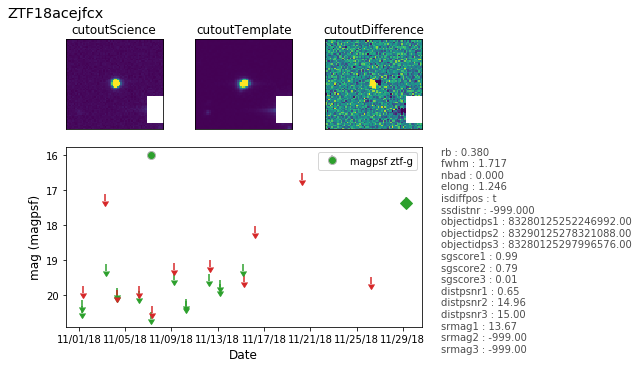

In [7]:
accepted_plot.summary_plot(choice(accepted))

In [8]:
rejected = dap.get_rejected_alerts()
rejected_plot = AmpelAlertPlotter(interactive=True)

2019-01-18 14:41:20 INFO Initialized AmpelAlertPlotter in interactive mode.


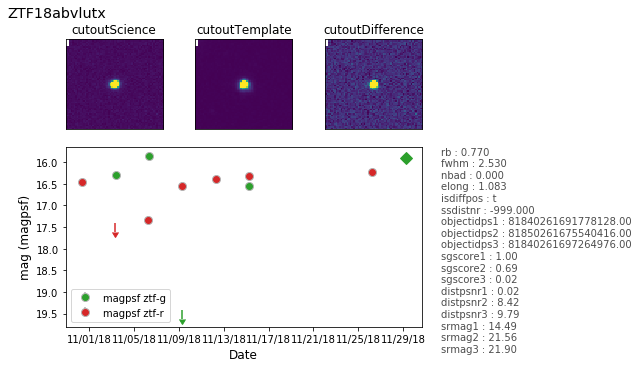

In [9]:
rejected_plot.summary_plot(choice(rejected))

# Run _DevAlertProcessor_ on previously accepted alerts

In [10]:
new_filter = RandFilter()
recursive_dap = DevAlertProcessor(new_filter)

print ("Reprocessing alerts from %s" % small_test_tar_path)
start = time.time()
recursive_dap.process_loaded_alerts(accepted)
end = time.time()
print ("Reprocessed %d alerts in %.2e sec"%(nproc, end-start))
new_accepted = recursive_dap.get_accepted_alerts()

Reprocessing alerts from ztf_public_20181129.tar.gz
2019-01-18 14:41:20 INFO - Rejecting 697251924815010000 (objectId: ZTF18abvetqi)
2019-01-18 14:41:20 INFO + Ingesting 697251920615010004 (objectId: ZTF18abvryvj)
2019-01-18 14:41:20 INFO - Rejecting 697251920415015001 (objectId: ZTF18abvdmcb)
2019-01-18 14:41:20 INFO + Ingesting 697252842615015009 (objectId: ZTF18acsbtfc)
2019-01-18 14:41:20 INFO - Rejecting 697252841315015005 (objectId: ZTF18acsbthq)
2019-01-18 14:41:20 INFO + Ingesting 697252841215010000 (objectId: ZTF18abtmpxj)
2019-01-18 14:41:20 INFO + Ingesting 697252382115010005 (objectId: ZTF18acbxqzh)
2019-01-18 14:41:20 INFO + Ingesting 697251923515015007 (objectId: ZTF18acsbtua)
2019-01-18 14:41:20 INFO - Rejecting 697252844615015010 (objectId: ZTF18acsbtvy)
2019-01-18 14:41:20 INFO + Ingesting 697252383715010000 (objectId: ZTF18absbxhb)
2019-01-18 14:41:20 INFO + Ingesting 697252383615015001 (objectId: ZTF18abupgps)
2019-01-18 14:41:20 INFO + Ingesting 697252382815010006 (

2019-01-18 14:41:20 INFO + Ingesting 697252382215015007 (objectId: ZTF18acsbthb)
2019-01-18 14:41:20 INFO + Ingesting 697252385215010000 (objectId: ZTF18abotviw)
2019-01-18 14:41:20 INFO + Ingesting 697251923115015010 (objectId: ZTF18abyozww)
2019-01-18 14:41:20 INFO + Ingesting 697252380015015002 (objectId: ZTF18acekwld)
2019-01-18 14:41:20 INFO + Ingesting 697251920715010013 (objectId: ZTF18acsbjpb)
2019-01-18 14:41:20 INFO 106 alert(s) processed (time required: 0s)
Reprocessed 200 alerts in 5.61e-02 sec


In [11]:
n_good, n_bad = len(recursive_dap.get_accepted_alerts()), len(recursive_dap.get_rejected_alerts())
print ("%d alerts accepted by the filter (%.2f perc)"%(n_good, 100*n_good/nproc))
print ("%d alerts rejected by the filter (%.2f perc)"%(n_bad, 100*n_bad/nproc))

59 alerts accepted by the filter (29.50 perc)
47 alerts rejected by the filter (23.50 perc)


2019-01-18 14:41:20 INFO Initialized AmpelAlertPlotter in interactive mode.


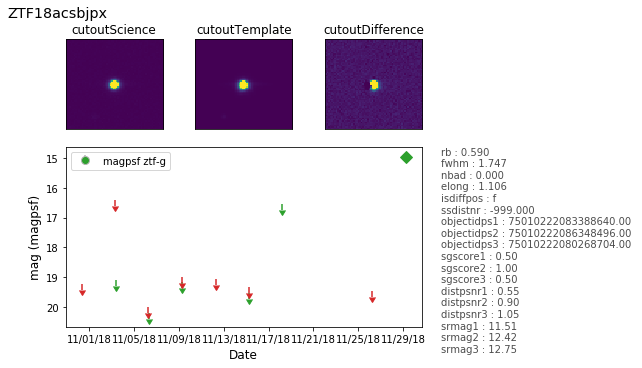

In [12]:
new_accepted_plot = AmpelAlertPlotter(interactive=True)
new_accepted_plot.summary_plot(choice(new_accepted))

In [13]:
import os
os.remove(small_test_tar_path)